## **Can <font color='darkred'>Heart Disease</font> be predicted?**

**Analysis By:**

Guilherme Caetano Oliveria, Lisa Desjarlais, Shreyas Goyal, and Emma Szeto _(Group 155)._

**Introduction:**
    
According to medical professionals at Johns Hopkins and Mount Sinai Health, there are five classifications of heart disease  <a href="(https://www.hopkinsmedicine.org/news/media/releases/updated_classification_system_captures_many_more_people_at_risk_for_heart_attack">(Johns Hopkins Medicine 2017)</a>. For our project we will first be analyzing the <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">Cleveland Heart Disease Data set.</a> Class 0 indicates no presence of heart disease, while classes 1 to 4 describe mild, moderate, severe and very severe heart disease, in that order. The data was compiled using the medical information of 303 patients. Each row in the data set represents a patient with some classification of heart disease and 13 other health attributes. The goal of our project is to answer the predictive question: Can we use these health attributes available to us to predict whether a future patient (with an unknown diagnosis) has some level of heart disease?



**Preliminary Exploratory Data Analysis:**

We load in all necessary libraries.


In [2]:
library(tidyverse)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 10)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2988884798.py, line 4)

Next, we load in our data using tidyverse's read_csv() function. We see that the column names have not been pre-specified. Thus, we rename our columns (predictor variables) using the colnames() function, according to the UCI repository. These variables represent: age, sex, chest pain type, resting blood pressure, serum cholestoral (mg/dl), fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, presence of exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flouroscopy, presence of heart defect, and severity of heart disease.

In [19]:
URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_data <- read_csv(URL, col_names=FALSE, show_col_types = FALSE)
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data <- cleveland_data |>
                    mutate(ca = as_factor(ca), thal = as_factor(thal), num = as_factor(num))
cleveland_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


Now, we try to find a relationship between predictor variables using the _pairs()_ function from the GGally library.

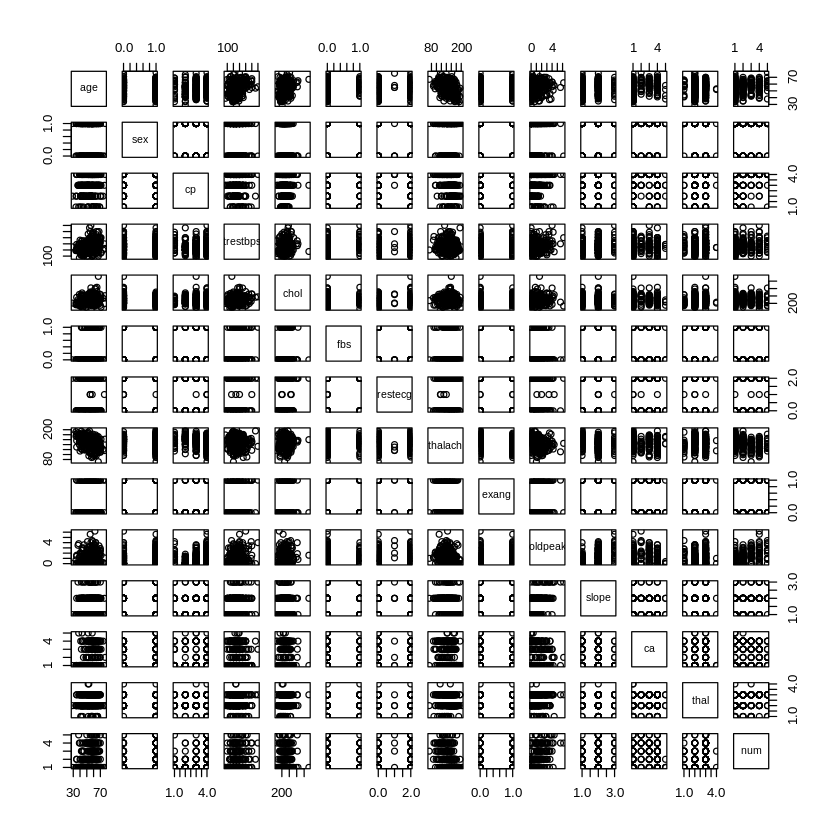

In [20]:
pairs(cleveland_data)

From this visualization, we see that most of our predictor variables are _categorical_. Also our output variable, num, doesn't seem to have any relationship with the predictor variables.

Since the plots are really small, we can't accurately visualize a relationship between some of the non-categorical variables. So, we create a larger plot of _cholesterol_ against _resting blood pressure_, with each severity of heart disease colorized and as different subplots.

In [2]:
chol_vs_trestbps <- cleveland_data |>
                    ggplot(aes(x = chol, y = trestbps, color = num)) +
                    geom_point() +
                    facet_grid(rows = vars(num)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Severity") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps

SyntaxError: invalid syntax (2415353775.py, line 1)

It seems there is no clear relationship between cholesterol and resting blood pressure.

We now plot age (a non-categorial variable) against num (our output variable). 

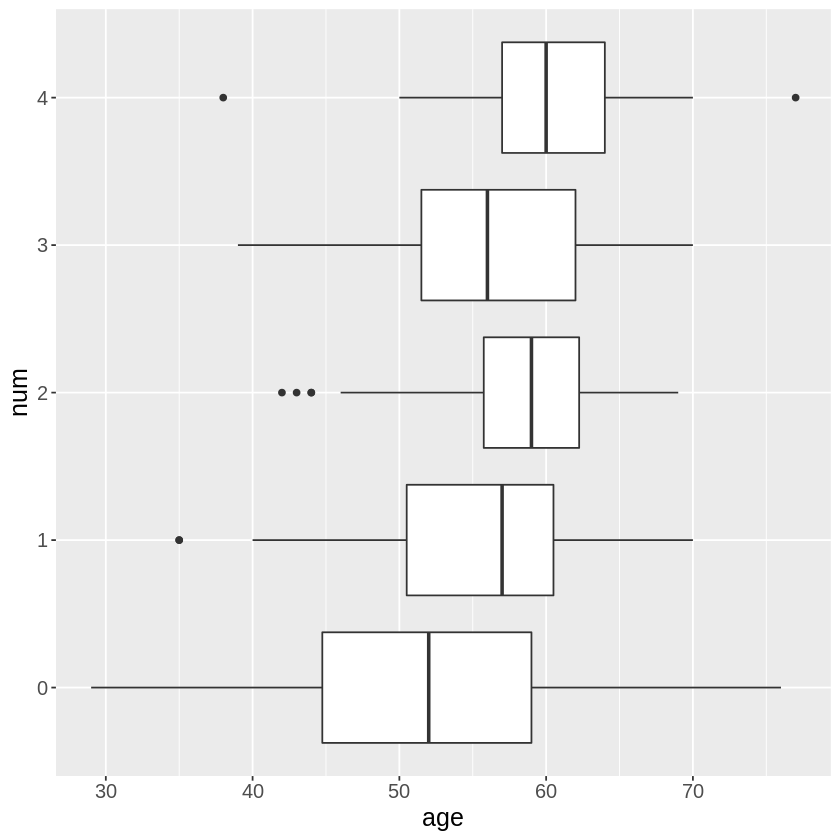

In [22]:
age_vs_num <- cleveland_data |>
                    ggplot(aes(x = age, y = num)) +
                    geom_boxplot(alpha = 1) +
                    theme(text = element_text(size = 15))

age_vs_num

From the above graph, most people with heart disease tend to lie in the 50 to 65 age group. However, we are not able to conclude how age might play a role into the severity of heart disease.

So far, we are neither able to visualize a relationship between any of the predictor variables, nor one between a predictor variable and our output variable num.

To better find relationships, we need to consider multiple regions, and not just Cleveland. Thus, we must load in heart disease data from other regions, and combine them into one table in order to perhaps make a prediction about how heart disease severity might change from region to region.

In [23]:
URL2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"

hungarian_data <- read_delim(URL2, col_names = FALSE, delim = " ")

colnames(hungarian_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")
hungarian_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,0,2,-9,308,0,1,-9,-9,2,1,-9,-9,0
36,1,2,120,166,0,0,180,0,0,-9,-9,-9,0
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0


**Methods:**
    
We will be considering data from multiple regions to conclude which predictors play the most crucial role in predicting heart disease. We will then use the K-nearest neighbours algorithm to classify a patient (with an unknown diagnosis) with some class of heart disease and then visualize our results using a scatter plot.

**Expected Outcomes and Significance:**

We expect to find the factors that best predict a class of heart disease. We predict increased cholesterol, resting blood pressure, and age, to have a strong relationship with a higher level of heart disease. The factors that can best be used to predict a class of heart disease, can help identify the leading risk factors for heart disease. This information can aid health care providers in diagnostics and in care. By identifying risk factors, anyone can reduce their risk for heart disease. If a medical professional notices a patient with higher cholesterol, they may be more likely to investigate possible heart disease. These findings can lead to such questions like: What is the ideal cholesterol level to minimize risk of heart disease? And, which heart disease risk factors differ between men and women?